# Edi09 - Nitrogen quantitative analyses

In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# Set up to find custom python package
import os
import sys
import numpy as np
sys.path.insert(1, ".")
sys.path.insert(1, "..")

In [37]:
from src import readfiles, wdscan, correct_quant, calczaf, helper_funs
import pickle
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# Quantitative analysis

In [38]:
sample = 'Edi09'
sample_folders = [Path(f'../data/raw/basaltic_glasses_StA/raw_quant_by_sample/{sample}/')]
# List of folders corresponding to the samples
category = 'basaltic glasses' # Category of this dataset (e.g. "glasses")
wd_scan = Path(f'../data/interim/basaltic_glasses/fits/key_params_{sample}.txt') # Path to wd scan fit parameters
std_dbase_info_file = Path('data/_dictionaries/standards.csv')

In [39]:
datalist = readfiles.find_files_and_folders(
                [sample], sample_folders,
                # apf_file = None,
                apf_file=Path('../data/_dictionaries/apf_values.csv'), #<- Can put None in here
                wd_scan=wd_scan
                )

datalist

Comments found: ['Edi09_100nA_30um_1', 'Edi09_100nA_30um_2', 'Edi09_100nA_30um_3', 'Edi09_50nA_20um_146.6_180s_1', 'Edi09_50nA_20um_146.6_180s_10', 'Edi09_50nA_20um_146.6_180s_2', 'Edi09_50nA_20um_146.6_180s_3', 'Edi09_50nA_20um_146.6_180s_4', 'Edi09_50nA_20um_146.6_180s_5', 'Edi09_50nA_20um_146.6_180s_6', 'Edi09_50nA_20um_146.6_180s_7', 'Edi09_50nA_20um_146.6_180s_8', 'Edi09_50nA_20um_146.6_180s_9']


,folder,comment,sample,paramfile,apf,apf_sd
0,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,Edi09_100nA_30um_1,Edi09,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
1,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,Edi09_100nA_30um_2,Edi09,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
2,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,Edi09_100nA_30um_3,Edi09,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
3,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,Edi09_50nA_20um_146.6_180s_1,Edi09,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
4,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,Edi09_50nA_20um_146.6_180s_10,Edi09,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
5,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,Edi09_50nA_20um_146.6_180s_2,Edi09,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
6,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,Edi09_50nA_20um_146.6_180s_3,Edi09,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
7,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,Edi09_50nA_20um_146.6_180s_4,Edi09,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
8,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,Edi09_50nA_20um_146.6_180s_5,Edi09,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2
9,..\data\raw\basaltic_glasses_StA\raw_quant_by_...,Edi09_50nA_20um_146.6_180s_6,Edi09,..\data\interim\basaltic_glasses\fits\key_para...,0.83,0.2


In [40]:
myspot = [None] * len(datalist.folder)

for i in range(len(datalist.folder)):
    peak, bg, standard, info = readfiles.read_and_organise_data(
                                    datalist.loc[i,:].copy(),
                                    bgi=False,
                                    save=False)
    myspot[i] = correct_quant.Spot()
    myspot[i].add_data(info, bg, peak, standard)
    myspot[i].add_wd_scan_params_from_file(wd_scan)
    print('Read dataset:', i + 1, 'of', len(datalist), ':',
          myspot[i].info.comment)
    myspot[i].comprehensify_data()


 loading path: ..\data\interim\basaltic_glasses\fits\key_params_Edi09.txt
{'sigma': 0.07078270428232214, 'center': 108.64793499672902}
Read dataset: 1 of 13 : Edi09_100nA_30um_1

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_Edi09.txt
{'sigma': 0.07078270428232214, 'center': 108.64793499672902}
Read dataset: 2 of 13 : Edi09_100nA_30um_2

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_Edi09.txt
{'sigma': 0.07078270428232214, 'center': 108.64793499672902}
Read dataset: 3 of 13 : Edi09_100nA_30um_3

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_Edi09.txt
{'sigma': 0.07078270428232214, 'center': 108.64793499672902}
Read dataset: 4 of 13 : Edi09_50nA_20um_146.6_180s_1

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_Edi09.txt
{'sigma': 0.07078270428232214, 'center': 108.64793499672902}
Read dataset: 5 of 13 : Edi09_50nA_20um_146.6_180s_10

 loading path: ..\data\interim\basaltic_glasses\fits\key_params_Edi09.txt
{'sigma':

In [41]:
correct_quant.process_datasets(
    myspot, 
    datalist, 
    num_mc_sims=100, 
    path_out=Path(f"../data/processed/basaltic_glasses/background_corrections/{sample}")
    )


Processing dataset: 1 of 13 : Edi09_100nA_30um_1
Correcting background
Saved bg correction figure for 2021-12-22_Edi09_100nA_30um_1
Resample cps to check stdev method
Montecarlo background correction
monte-carlo loop 0 of 100
monte-carlo loop 50 of 100
Saved montecarlo bg correction figure for 2021-12-22_Edi09_100nA_30um_1
correct height/area ratio
original kraw: 0.00 ± 100.00%
corrected kraw: 0.40 ± 30.25%

Processing dataset: 2 of 13 : Edi09_100nA_30um_2
Correcting background
Saved bg correction figure for 2021-12-22_Edi09_100nA_30um_2
Resample cps to check stdev method
Montecarlo background correction
monte-carlo loop 0 of 100
monte-carlo loop 50 of 100
Saved montecarlo bg correction figure for 2021-12-22_Edi09_100nA_30um_2
correct height/area ratio
original kraw: 0.00 ± 100.00%
corrected kraw: 0.63 ± 26.75%

Processing dataset: 3 of 13 : Edi09_100nA_30um_3
Correcting background
Saved bg correction figure for 2021-12-22_Edi09_100nA_30um_3
Resample cps to check stdev method
Montecar

## Write calczaf file

In [42]:
samples = [sample]
category = 'basaltic glasses'
subfolder = Path(f'../data/processed/basaltic_glasses/calczaf_files/{sample}/')

write_detection_limit_calczaf_files = True
detlim_subfolder = subfolder / Path('detlim')

# note: in the subfolder there must be a file specifying valence.
# this can be copied from the _dictionaries folder.
valence_dict = readfiles.read_valence_file(subfolder, pattern='valence*')
standard_database_dict = pd.read_csv(
    '../data/_dictionaries/standards.csv',
     index_col=0, 
     header=None, 
     squeeze=True).to_dict()

standard_database_dict

{'Sanidine': 3000,
 'Diopside': 3001,
 '08_Pollucite': 3002,
 'Albite': 3003,
 'GaN': 608,
 '22_Mo': 542,
 '09_Vanadium_Wire_Alfa': 523,
 'BN': 604}

In [43]:
# Make a dictionary
sampledata = {sample: myspot}

Get the major element analyses

In [44]:
majors_summary = pd.read_csv(
    "../data/processed/basaltic_glasses/basaltic_glasses_majors_summary.csv",
    header = [0, 1], index_col=0)
majors_summary[sample]

,wt% mean,stdev
Si,22.164,0.046
Al,7.887,0.041
Cl,0.007,0.003
P,0.084,0.003
Fe,5.843,0.081
Mn,0.245,0.011
Cr,0.061,0.004
K,0.158,0.006
Ca,10.119,0.028
Ru,0.009,0.021


In [45]:
# Remove Oxygen and Total from the dataframe to get all other element values
majors_relevant = majors_summary[sample].loc[
    majors_summary[sample].index[~majors_summary[sample].index.isin(["O", "Total"])],
    "wt% mean",
]
majors_relevant

Si    22.164
Al     7.887
Cl     0.007
P      0.084
Fe     5.843
Mn     0.245
Cr     0.061
K      0.158
Ca    10.119
Ru     0.009
Na     1.266
Mg     5.185
Name: wt% mean, dtype: float64

In [46]:
# For multiple different methods of processing the data, add a description
run_descriptor = ['_1_base', '_2_bg', '_3_bg_apf']  
# Leave as a list of an empty string if not using: e.g. run_descriptor = ['']

for i in range(len(samples)):

    # Here we pass in these arguments as a dictionary - this is useful in order
    # to reuse the arguments for the detection limit function. But you can
    # alternatively pass in each argument just by defining it in the function
    # as normal (see glasses example).

    args = {
              'elementByDifference' : 'h' # string element symbol
            , 'elementByStoichToStoichOxygen' : None # string element symbol
            , 'stoichOxygenRatio' : 0
            # for hyalophane there is H
            # that can be defined stoichiometrically relative to N:
            , 'elementByStoichToOtherElement' : None
            , 'OtherElement' : None
            , 'stoichElementRatio' : None

            , 'correct_bg' : False
            , 'correct_apf' : False

            # Elements to omit from matrix correction
            # (e.g. if analysed but not actually present in sample)
            , 'remove_elements' : None

            , 'definedElements' : majors_relevant.index # list of element symbols to add
            , 'definedElementWts' : majors_relevant.values # list of known element wt% to add
            }
    
    # Make copies of args with different values
    args2 = args.copy()
    args2["correct_bg"] = True
    args2["correct_apf"] = False

    args3 = args2.copy()
    args3["correct_bg"] = True
    args3["correct_apf"] = True

    args_list = [args, args2, args3]

    for j in range(len(run_descriptor)):
        print("******************************************************")
        print(args_list[j]["correct_bg"], args_list[j]["correct_apf"])
        print("******************************************************")

        calczaf_path_out = subfolder / '{}{}.dat'.format(
                                            samples[i], run_descriptor[j])
        open(calczaf_path_out, 'w').close()  # Erase contents of file

        if write_detection_limit_calczaf_files:
            
            detlim_path_out = detlim_subfolder / '{}{}_detlim.dat'.format(
                                            samples[i], run_descriptor[j])
            open(detlim_path_out, 'w').close()  # Erase contents of file

        for spot in sampledata[samples[i]]:

            calczaf.write_calczaf_input(
                spot, calczaf_path_out, valence_dict, standard_database_dict,
                accV=10, calcMode=2, taAngle=40, Oxide_or_Element=1,
                **args_list[j]) # <- **args unpacks the args dictionary defined earlier
                # so that all those arguments are passed into the function
                # without the need to type them all out.

            if write_detection_limit_calczaf_files:
                if args_list[j]['correct_bg']:

                    detlim_spot = correct_quant.create_detection_limit_spot(spot)

                    calczaf.write_calczaf_input(
                        detlim_spot, detlim_path_out, valence_dict, 
                        standard_database_dict,
                        accV=10, calcMode=2, taAngle=40, Oxide_or_Element=1,
                        **args_list[j])
                    
                else:
                    print('\n\nWarning: Not writing detection limit file.' 
                            'Calculating detection limit does not make sense'
                            ' except on background-corrected data. Raw data files' 
                            ' contain an estimate of detection limit without bg'
                            ' correction.\n')
                    
    

******************************************************
False False
******************************************************
Wrote CALCZAF file for Edi09_100nA_30um_1 to ..\data\processed\basaltic_glasses\calczaf_files\Edi09\Edi09_1_base.dat



Wrote CALCZAF file for Edi09_100nA_30um_2 to ..\data\processed\basaltic_glasses\calczaf_files\Edi09\Edi09_1_base.dat



Wrote CALCZAF file for Edi09_100nA_30um_3 to ..\data\processed\basaltic_glasses\calczaf_files\Edi09\Edi09_1_base.dat



Wrote CALCZAF file for Edi09_50nA_20um_146.6_180s_1 to ..\data\processed\basaltic_glasses\calczaf_files\Edi09\Edi09_1_base.dat



Wrote CALCZAF file for Edi09_50nA_20um_146.6_180s_10 to ..\data\processed\basaltic_glasses\calczaf_files\Edi09\Edi09_1_base.dat



Wrote CALCZAF file for Edi09_50nA_20um_146.6_180s_2 to ..\data\processed\basaltic_glasses\calczaf_files\Edi09\Edi09_1_base.dat



Wrote CALCZAF file for Edi09_50nA_20um_146.6_180s_3 to ..\data\processed\basaltic_glasses\calczaf_files\Edi09\Edi09_1_base.dat


## Process calczaf outputs

In [47]:
folderpath = Path(f'../data/processed/basaltic_glasses/calczaf_files/{sample}/')

helper_funs.check_calczaf_folder_exists(folderpath)
valence_file = sorted(folderpath.glob('valence*'))[0]

results = calczaf.process_calczaf_outputs(folderpath, valence_file)

# For detection limits

results_detlim = calczaf.process_calczaf_outputs(folderpath / 'detlim/', valence_file, detlim=True)

[                     0           1           2           3           4           5           6           7           8           9           10          11          12
wt% element                                                                                                                                                            
Si            22.164000   22.164000   22.164000   22.164000   22.164000   22.164000   22.164000   22.164000   22.164000   22.164000   22.164000   22.164000   22.164000
Al             7.887000    7.887000    7.887000    7.887000    7.887000    7.887000    7.887000    7.887000    7.887000    7.887000    7.887000    7.887000    7.887000
Ca            10.119000   10.119000   10.119000   10.119000   10.119000   10.119000   10.119000   10.119000   10.119000   10.119000   10.119000   10.119000   10.119000
Mg             5.185000    5.185000    5.185000    5.185000    5.185000    5.185000    5.185000    5.185000    5.185000    5.185000    5.185000    5.185000    

Produce summaries

In [48]:
summary_tables = correct_quant.write_summary_excel_tables(
    myspot, 
    f"../data/processed/basaltic_glasses/kraw_summaries_{sample}.xlsx"
    )

typical_kratios = pd.DataFrame({
    "K-ratio": [
        summary_tables[0]["original.kraw_pcnt"].mean(),
        summary_tables[0]["montecarlo.kraw_pcnt"].mean(),
        summary_tables[0]["montecarlo.kraw_apf_pcnt"].mean()
    ],
    "Stdev % (relative)": [
        max(
            summary_tables[0]["original.kraw_stdev_pcnt"].mean(),
            summary_tables[0]["original.kraw_pcnt"].std()
            ),
        max(
            summary_tables[0]["montecarlo.kraw_stdev_pcnt"].mean(),
            summary_tables[0]["montecarlo.kraw_pcnt"].std()
            ),
        max(
            summary_tables[0]["montecarlo.kraw_stdev_apf_pcnt"].mean(),
            summary_tables[0]["montecarlo.kraw_apf_pcnt"].std()
            )
    ]
}, index = [
    "Original K-ratio (%)", 
    "Bg-corrected K-ratio (%)", 
    "Bg- and APF-corrected K-ratio (%)"
    ]
)

typical_kratios.insert(
    1, 
    column="Stdev (absolute)", 
    value = typical_kratios["K-ratio"] * typical_kratios["Stdev % (relative)"] / 100
    )

typical_kratios["filename"] = results["wtdata"].keys()
typical_kratios.reset_index(inplace=True)
typical_kratios.set_index("filename", inplace=True)
        # .loc[nm, "Stdev % (relative)"]/100
# )
typical_kratios


,index,K-ratio,Stdev (absolute),Stdev % (relative)
filename,,,,
Edi09_1_base,Original K-ratio (%),0.000000,0.000000,100.000000
Edi09_2_bg,Bg-corrected K-ratio (%),0.432308,0.069079,15.979231
Edi09_3_bg_apf,Bg- and APF-corrected K-ratio (%),0.521538,0.152061,29.156154


Plot all spots grouped by their method with stdev and detlims

In [60]:
suffix = "3_bg_apf"
stdev_string = "kraw_stdev_apf_pcnt"

In [61]:
results["wtdata"][f"{sample}_{suffix}"]

,0,1,2,3,4,5,6,7,8,9,10,11,12,average,stdev,minimum,maximum
wt% element,,,,,,,,,,,,,,,,,
Si,22.164000,22.164000,22.164000,22.164000,22.164000,22.164000,22.164000,22.164000,22.164000,22.164000,22.164000,22.164000,22.164000,22.164000,7.395563e-15,22.164000,22.164000
Al,7.887000,7.887000,7.887000,7.887000,7.887000,7.887000,7.887000,7.887000,7.887000,7.887000,7.887000,7.887000,7.887000,7.887000,0.000000e+00,7.887000,7.887000
Ca,10.119000,10.119000,10.119000,10.119000,10.119000,10.119000,10.119000,10.119000,10.119000,10.119000,10.119000,10.119000,10.119000,10.119000,0.000000e+00,10.119000,10.119000
Mg,5.185000,5.185000,5.185000,5.185000,5.185000,5.185000,5.185000,5.185000,5.185000,5.185000,5.185000,5.185000,5.185000,5.185000,9.244454e-16,5.185000,5.185000
Fe,5.843000,5.843000,5.843000,5.843000,5.843000,5.843000,5.843000,5.843000,5.843000,5.843000,5.843000,5.843000,5.843000,5.843000,1.848891e-15,5.843000,5.843000
Mn,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,0.245000,5.777784e-17,0.245000,0.245000
K,0.158000,0.158000,0.158000,0.158000,0.158000,0.158000,0.158000,0.158000,0.158000,0.158000,0.158000,0.158000,0.158000,0.158000,2.888892e-17,0.158000,0.158000
Na,1.266000,1.266000,1.266000,1.266000,1.266000,1.266000,1.266000,1.266000,1.266000,1.266000,1.266000,1.266000,1.266000,1.266000,2.311114e-16,1.266000,1.266000
H,0.445574,0.440651,0.442758,0.442998,0.443723,0.440412,0.443409,0.442597,0.440272,0.443209,0.443049,0.448231,0.441812,0.442977,2.160394e-03,0.440272,0.448231


In [62]:
N_by_method = pd.DataFrame(
    {"comment": datalist["comment"],
     "N wt": results["wtdata"][f"{sample}_{suffix}"].loc["N", list(range(0, len(datalist.index)))],
     "N detlim": results_detlim["wtdata"][f"{sample}_{suffix}_detlim"].loc["N", list(range(0, len(datalist.index)))], 
     "N stdev pct": summary_tables[0][f"montecarlo.{stdev_string}"],
     "N stdev abs": (
         results["wtdata"][f"{sample}_{suffix}"]
        .loc["N", list(range(0, len(datalist.index)))] * 
        summary_tables[0][f"montecarlo.{stdev_string}"]/100
        )
     }
     )

N_by_method["method"] = N_by_method["comment"].str.replace(r'_[0-9]+$', '', regex=True)
N_by_method.groupby("method")["N wt"].mean()

method
Edi09_100nA_30um              0.098309
Edi09_50nA_20um_146.6_180s    0.098515
Name: N wt, dtype: float64

In [63]:
N_by_method.round(3).sort_values("method")

,comment,N wt,N detlim,N stdev pct,N stdev abs,method
0,Edi09_100nA_30um_1,0.075,0.025,30.25,0.023,Edi09_100nA_30um
1,Edi09_100nA_30um_2,0.119,0.021,26.75,0.032,Edi09_100nA_30um
2,Edi09_100nA_30um_3,0.100,0.025,27.06,0.027,Edi09_100nA_30um
3,Edi09_50nA_20um_146.6_180s_1,0.098,0.027,27.30,0.027,Edi09_50nA_20um_146.6_180s
4,Edi09_50nA_20um_146.6_180s_10,0.092,0.033,30.31,0.028,Edi09_50nA_20um_146.6_180s
5,Edi09_50nA_20um_146.6_180s_2,0.121,0.022,26.99,0.033,Edi09_50nA_20um_146.6_180s
6,Edi09_50nA_20um_146.6_180s_3,0.095,0.029,28.28,0.027,Edi09_50nA_20um_146.6_180s
7,Edi09_50nA_20um_146.6_180s_4,0.102,0.032,29.31,0.030,Edi09_50nA_20um_146.6_180s
8,Edi09_50nA_20um_146.6_180s_5,0.123,0.031,26.60,0.033,Edi09_50nA_20um_146.6_180s
9,Edi09_50nA_20um_146.6_180s_6,0.096,0.030,29.73,0.029,Edi09_50nA_20um_146.6_180s


Text(0.5, 1.0, 'Edi09')

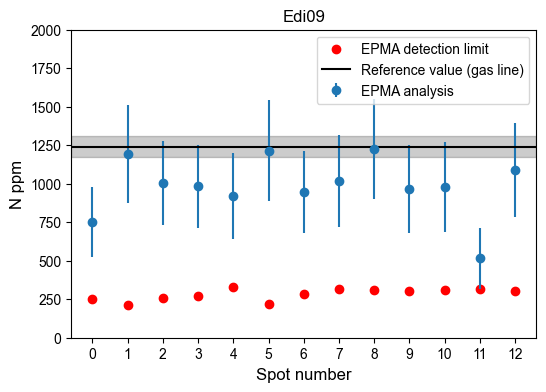

In [81]:
N_by_method_sorted = N_by_method.sort_values("method").reset_index()

plt.errorbar(
    x=N_by_method_sorted.index, 
    y=N_by_method_sorted["N wt"] * 10000, 
    yerr=N_by_method_sorted["N stdev abs"] * 10000,
    marker="o",
    linestyle="",
    label="EPMA analysis"
    )

plt.scatter(
    x=N_by_method_sorted.index,
    y=N_by_method_sorted["N detlim"]*10000,
    color="r",
    label="EPMA detection limit",
    zorder=0
)
plt.xticks(range(0,13))
plt.ylim(0, 2000)
plt.ylabel("N ppm")
plt.xlabel("Spot number")

plt.axhline(y=1240, color="k", label="Reference value (gas line)")
plt.axhspan(ymin=(1240-70), ymax=(1240+70), color="k", alpha=0.2)
plt.legend()
plt.title(sample)


In [82]:
n_summary = {}
for nm in results["wtdata"].keys():
    n_summary[nm] = results["wtdata"][nm].loc["N", ["average", "stdev"]]
    n_summary[nm].rename({"average": "N wt% average"}, inplace=True)
    n_summary[nm].rename({"stdev": "stdev (multiple measurements)"}, inplace=True)
    n_summary[nm]["typical stdev on individual measurement"] = (
        n_summary[nm]["N wt% average"] * 
        typical_kratios
        .loc[nm, "Stdev % (relative)"]/100
    )

pd.concat(n_summary, axis=1).transpose()

,N wt% average,stdev (multiple measurements),typical stdev on individual measurement
Edi09_1_base,0.000000,0.000000,0.000000
Edi09_2_bg,0.081629,0.016748,0.013044
Edi09_3_bg_apf,0.098467,0.019308,0.028709


In [83]:
results_detlim["wtdata"][f"{sample}_3_bg_apf_detlim"].loc["N", :]

0          0.024923
1          0.021369
2          0.025494
3          0.027066
4          0.032989
5          0.021907
6          0.028659
7          0.031892
8          0.030935
9          0.030438
10         0.031082
11         0.031598
12         0.030037
average    0.028338
stdev      0.003850
minimum    0.021369
maximum    0.032989
Name: N, dtype: float64

In [84]:
wt_pct_summary_table = pd.concat(
    {k: v[["average", "stdev"]] for k, v in results["wtdata"].items()},
    axis=1
    ).round(3)

# wt_pct_summary_table.to_csv("../data/processed/hyalophane_StA/wt_pct_summary_GaNcalib.csv")

wt_pct_summary_table


Edi09_1_base       Edi09_2_bg        Edi09_3_bg_apf       
                 average stdev    average  stdev        average  stdev
wt% element                                                           
Si                22.164   0.0     22.164  0.000         22.164  0.000
Al                 7.887   0.0      7.887  0.000          7.887  0.000
Ca                10.119   0.0     10.119  0.000         10.119  0.000
Mg                 5.185   0.0      5.185  0.000          5.185  0.000
Fe                 5.843   0.0      5.843  0.000          5.843  0.000
Mn                 0.245   0.0      0.245  0.000          0.245  0.000
K                  0.158   0.0      0.158  0.000          0.158  0.000
Na                 1.266   0.0      1.266  0.000          1.266  0.000
H                  0.454   0.0      0.445  0.002          0.443  0.002
N                  0.000   0.0      0.082  0.017          0.098  0.019
P                  0.084   0.0      0.084  0.000          0.084  0.000
Cl                 0.007   0.0      0.007  0.000          0.007  0.000
Cr                 0.061   0.0      0.061  0.000          0.061  0.000
Ru                 0.009   0.0      0.009  0.000          0.009  0.000
O                 46.518   0.0     46.446  0.015         46.431  0.017
TOTAL            100.000   0.0    100.000  0.000        100.000  0.000

This is with hydrogen by difference.